# Homework 3

**Group 5:** AP Prabhakar, Ophelia Winslett, Sabrina Downie, Umamah Uddin, Carly Kimpling

***

1. The Leaky Integrate and Fire model will be optimized with voltage-gated sodium channels because the emphasis of depolarization, leading to more realistic spike behavior caused by accurate action potentials. This can be seen with the dynamic behavior of a neuron. The excitability of a cell is dependent on the varied inputs going through the channel. After being depolarized, the voltage-gated channels remain inactive for a short period of time, which represents the refractory period. Adding this will change the time duration in between each spike caused by the action potentials. With the addition of the channels, not only will we see more accurate spike sizes, but also accurate propagation of where the action potentials reside. 
2. Below is our original LIF model without voltage-gated channels. 

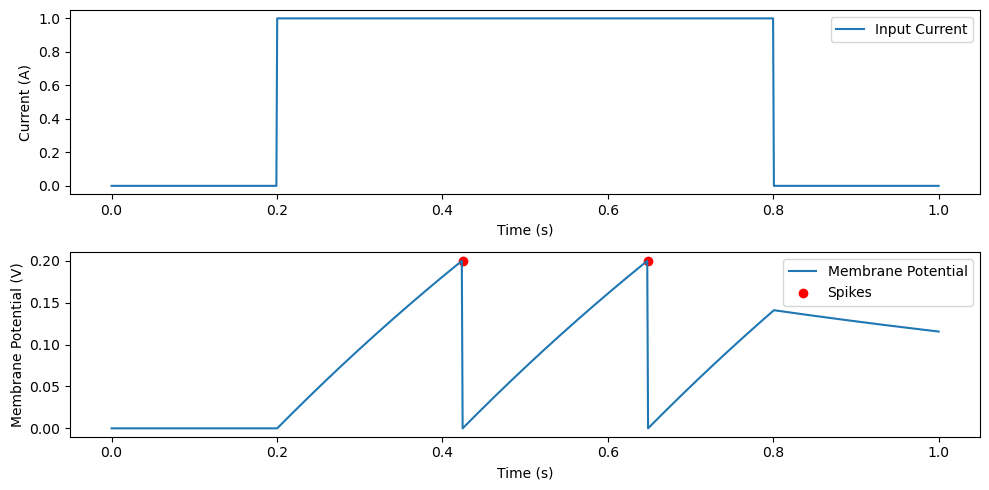

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_integrate_and_fire(simulation_time, dt, input_current, R, C, threshold, reset_voltage):
    # Initialize variables
    num_steps = int(simulation_time / dt)
    time = np.linspace(0, simulation_time, num_steps)
    membrane_potential = np.zeros(num_steps)
    spike_times = []

    # Simulation loop
    for i in range(1, num_steps):
        # Update membrane potential using the leaky integrate-and-fire model equation
        membrane_potential[i] = membrane_potential[i - 1] + (
            (-membrane_potential[i - 1] + input_current[i - 1] * R) / (R * C)
        ) * dt

        # Check for spike condition
        if membrane_potential[i] >= threshold:
            spike_times.append(time[i])
            membrane_potential[i] = reset_voltage

    return time, membrane_potential, spike_times

# Simulation parameters
simulation_time = 1.0  # seconds
dt = 0.001  # seconds (time step)
R = 1.0  # membrane resistance (ohms)
C = 1.0  # membrane capacitance (farads)
threshold = 0.2  # spike threshold voltage (volts)
reset_voltage = 0.0  # reset voltage after spike (volts)

# Generate input current (for example, a step current)
input_current = np.zeros(int(simulation_time / dt))
input_current[int(0.2 / dt):int(0.8 / dt)] = 1.0  # modified input current (0.6 seconds long)

# Run the simulation
time, membrane_potential, spike_times = leaky_integrate_and_fire(
    simulation_time, dt, input_current, R, C, threshold, reset_voltage
)

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time, input_current, label='Input Current')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, membrane_potential, label='Membrane Potential')
plt.scatter(spike_times, [threshold] * len(spike_times), color='red', marker='o', label='Spikes')
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (V)')
plt.legend()

plt.tight_layout()
plt.show()

Below is our revised LIF model that includes voltage-gated channels. 

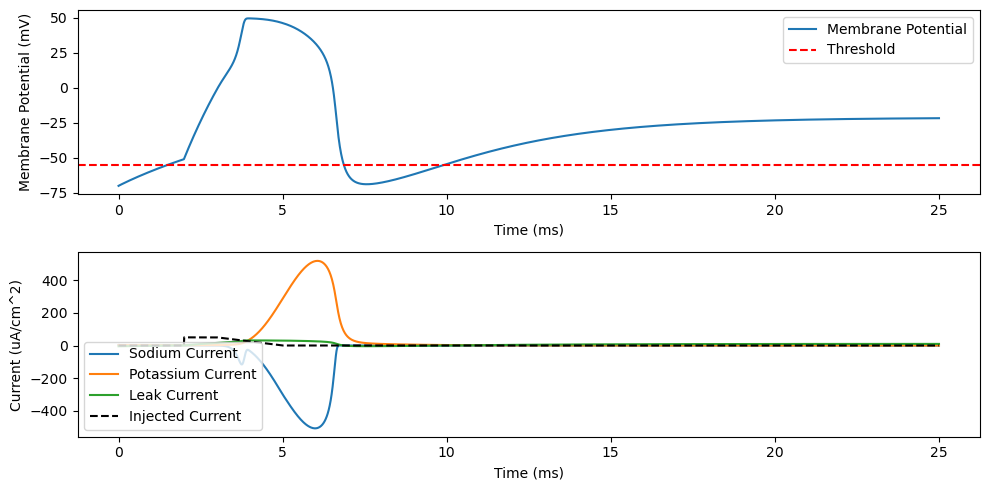

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def modified_hodgkin_huxley_model(simulation_time, dt, injected_current_duration, sodium_current_magnitude):
    # Simulation parameters
    num_steps = int(simulation_time / dt)
    time = np.linspace(0, simulation_time, num_steps)

    # Neuron parameters
    Cm = 1.0  # membrane capacitance (uF/cm^2)
    g_Na = 400.0  # increased sodium conductance (mS/cm^2)
    g_K = 36.0  # potassium conductance (mS/cm^2)
    g_L = 0.3  # leak conductance (mS/cm^2)
    E_Na = 50.0  # sodium reversal potential (mV)
    E_K = -77.0  # potassium reversal potential (mV)
    E_L = -54.387  # leak reversal potential (mV)

    # Initial conditions
    Vm = -70.0  # initial membrane potential (mV)
    m = 0.05  # initial sodium activation gate
    h = 0.6  # initial sodium inactivation gate
    n = 0.32  # initial potassium activation gate

    # Arrays to store results
    membrane_potential = np.zeros(num_steps)
    sodium_current = np.zeros(num_steps)
    potassium_current = np.zeros(num_steps)
    leak_current = np.zeros(num_steps)

    # Injection parameters
    injected_current = np.zeros(num_steps)
    injected_current[int(2 / dt):int((2 + injected_current_duration) / dt)] = sodium_current_magnitude  # initial pulse

    # Linear decay of injected current after the pulse
    decay_duration = 2.0  # duration of the linear decay
    decay_steps = int(decay_duration / dt)
    injected_current[int((2 + injected_current_duration) / dt):int((2 + injected_current_duration + decay_duration) / dt)] = np.linspace(sodium_current_magnitude, 0, decay_steps)

    # Simulation loop
    for i in range(num_steps):
        # Hodgkin-Huxley model equations
        alpha_m = 0.1 * (25 - Vm) / (np.exp((25 - Vm) / 10) - 1)
        beta_m = 4.0 * np.exp(-Vm / 18)
        alpha_h = 0.07 * np.exp(-Vm / 20)
        beta_h = 1.0 / (np.exp((30 - Vm) / 10) + 1)
        alpha_n = 0.01 * (10 - Vm) / (np.exp((10 - Vm) / 10) - 1)
        beta_n = 0.125 * np.exp(-Vm / 80)

        m += dt * (alpha_m * (1 - m) - beta_m * m)
        h += dt * (alpha_h * (1 - h) - beta_h * h)
        n += dt * (alpha_n * (1 - n) - beta_n * n)

        I_Na = g_Na * m**3 * h * (Vm - E_Na)
        I_K = g_K * n**4 * (Vm - E_K)
        I_L = g_L * (Vm - E_L)

        dVm = (-(I_Na + I_K + I_L - injected_current[i]) + 10) / Cm  # Inject a small current for simulation

        Vm += dt * dVm

        # Store results
        membrane_potential[i] = Vm
        sodium_current[i] = I_Na
        potassium_current[i] = I_K
        leak_current[i] = I_L

    return time, membrane_potential, sodium_current, potassium_current, leak_current, injected_current

# Simulation parameters
simulation_time = 25.0  # ms
dt = 0.01  # ms
injected_current_duration = 1.0  # ms
sodium_current_magnitude = 50.0  # Increased sodium current magnitude

# Run the simulation
time, membrane_potential, sodium_current, potassium_current, leak_current, injected_current = modified_hodgkin_huxley_model(
    simulation_time, dt, injected_current_duration, sodium_current_magnitude
)

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time, membrane_potential, label='Membrane Potential')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.axhline(y=-55, color='r', linestyle='--', label='Threshold')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, sodium_current, label='Sodium Current')
plt.plot(time, potassium_current, label='Potassium Current')
plt.plot(time, leak_current, label='Leak Current')
plt.plot(time, injected_current, label='Injected Current', linestyle='--', color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Current (uA/cm^2)')
plt.legend()

plt.tight_layout()
plt.show()

3. The introduction of the voltage-gated ion channels completely changed the model that ChatGPT used to model the leaky integrate and fire model of neurons. Without the voltage-gated ion channels, ChatGPT created its own model that very roughly mimicked the membrane potential of a neuron as a result of an applied current. With the addition of the voltage gated ion channels, Chat GPT used a well-known model called the Hodgkin-Huxley model that describes initiation and propagation of action potentials in neurons. This model was much more realistic than the initial model without voltage-gated ion channels. 
4. We have found it very difficult to work collaboratively in GitHub. We cannot figure out how to all work on one document at the same time, so we have been meeting and compiling all our work onto a single document in Juptyr and then uploading that to the repository.  
5. Modeling a simple feedforward neural network trained using gradient descent and backpropagation involves more complexity compared to the LIF neuron model. Neural networks have multiple neurons, layers, weights and connections. Additionally it can be non-lineary. In a feedforward neural network, there are multiple layers and hidden layers, creating a network structure. The LIF model usually only considers the behavior of a single neuron, making it much simpler. Neural networks also have weights associated with each connection which influences the final output. Backpropagation involves computing gradients and updating weights, each layer at a time to minimize errors in the network’s output. Gradient descent is an optimization algorithm used to find the minimum of a loss function by changing the parameters of a model. While coding a simple feedforward NN will be more complicated, it is definitely possible.